<a href="https://colab.research.google.com/github/alexradecki/pokedex/blob/main/Pokedex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pokedex
## Author: Alex Radecki
Using the data base on all Pokemon up to Gen 7 (Source: https://www.kaggle.com/datasets/abcsds/pokemon), we will create an interactive Pokedex with working GUI after performing Exploratory Data Analysis on our data set.

## Import and Validation

In [ ]:
from google.colab import files
files.upload()

import pandas as pd

## Uploading pokemon database
df = pd.read_csv('pokemon_data.csv')

Saving pokemon_data.csv to pokemon_data.csv


In [ ]:
## Verifying dataset was properly imported
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Note that the database does not have a BST (Base Stat Total) column, so we will add one now

In [ ]:
df['BST'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']

## Validating BST column was properly implemented
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


We can see that for Pokemon with unique names, such as Mega Venusaur, the name looks a bit cluttered. We will make these names a little neater by creating a function that adds parentheses around these special names.

In [ ]:
def addParentheses(name):
  list = [x for x in name]
  for i in range(1, len(list)):
    if list[i].isupper():
      list[i] = ' ' + list[i]
  finalList = ''.join(list).split(' ')
  length = len(finalList)
  if length > 1:
    finalList.insert(1, '(')
    finalList.append(')')
  return ' '.join(finalList)

In [ ]:
## Applying addParentheses function to our data frame
df['Name'] = df['Name'].apply(addParentheses)
## Verifying the function was successful
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,Venusaur ( Mega Venusaur ),Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


In [ ]:
# Backing up data frame
df.to_json('pokemonData.json')

## Statistical Analysis

Let's look for the best and worst Pokemon for each stat and BST. We will first create functions to find max and min, a list of the stats we wish to find (If we want to change it in the future) and call our functions on our Pokemon data frame using our list.

In [ ]:
def maxStats(df, col_list):
  message = ''
  for col in col_list:
    stat = df[col].max()
    indexMax = df[col].idxmax()
    name = df.at[indexMax, 'Name']
    message += name + "'s " + col + ' of ' + str(stat) + ' is the highest.' + '\n'
  return message

def minStats(df, col_list):
  message = ''
  for col in col_list:
    stat = df[col].min()
    indexMin = df[col].idxmin()
    name = df.at[indexMin, 'Name']
    message += name + "'s " + col + ' of ' + str(stat) + ' is the lowest.' + '\n'
  return message

In [ ]:
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'BST']

print(maxStats(df, stats))
print(minStats(df, stats))

Blissey's HP of 255 is the highest.
Mewtwo ( Mega  Mewtwo  X )'s Attack of 190 is the highest.
Steelix ( Mega  Steelix )'s Defense of 230 is the highest.
Mewtwo ( Mega  Mewtwo  Y )'s Sp. Atk of 194 is the highest.
Shuckle's Sp. Def of 230 is the highest.
Deoxys ( Speed  Forme )'s Speed of 180 is the highest.
Mewtwo ( Mega  Mewtwo  X )'s BST of 780 is the highest.

Shedinja's HP of 1 is the lowest.
Chansey's Attack of 5 is the lowest.
Chansey's Defense of 5 is the lowest.
Shuckle's Sp. Atk of 10 is the lowest.
Caterpie's Sp. Def of 20 is the lowest.
Shuckle's Speed of 5 is the lowest.
Sunkern's BST of 180 is the lowest.



We will now create a scatter plot to see if there is any correlation between the stats.

array([[<Axes: xlabel='HP', ylabel='HP'>,
        <Axes: xlabel='Attack', ylabel='HP'>,
        <Axes: xlabel='Defense', ylabel='HP'>,
        <Axes: xlabel='Sp. Atk', ylabel='HP'>,
        <Axes: xlabel='Sp. Def', ylabel='HP'>,
        <Axes: xlabel='Speed', ylabel='HP'>],
       [<Axes: xlabel='HP', ylabel='Attack'>,
        <Axes: xlabel='Attack', ylabel='Attack'>,
        <Axes: xlabel='Defense', ylabel='Attack'>,
        <Axes: xlabel='Sp. Atk', ylabel='Attack'>,
        <Axes: xlabel='Sp. Def', ylabel='Attack'>,
        <Axes: xlabel='Speed', ylabel='Attack'>],
       [<Axes: xlabel='HP', ylabel='Defense'>,
        <Axes: xlabel='Attack', ylabel='Defense'>,
        <Axes: xlabel='Defense', ylabel='Defense'>,
        <Axes: xlabel='Sp. Atk', ylabel='Defense'>,
        <Axes: xlabel='Sp. Def', ylabel='Defense'>,
        <Axes: xlabel='Speed', ylabel='Defense'>],
       [<Axes: xlabel='HP', ylabel='Sp. Atk'>,
        <Axes: xlabel='Attack', ylabel='Sp. Atk'>,
        <Axes: xlabel='

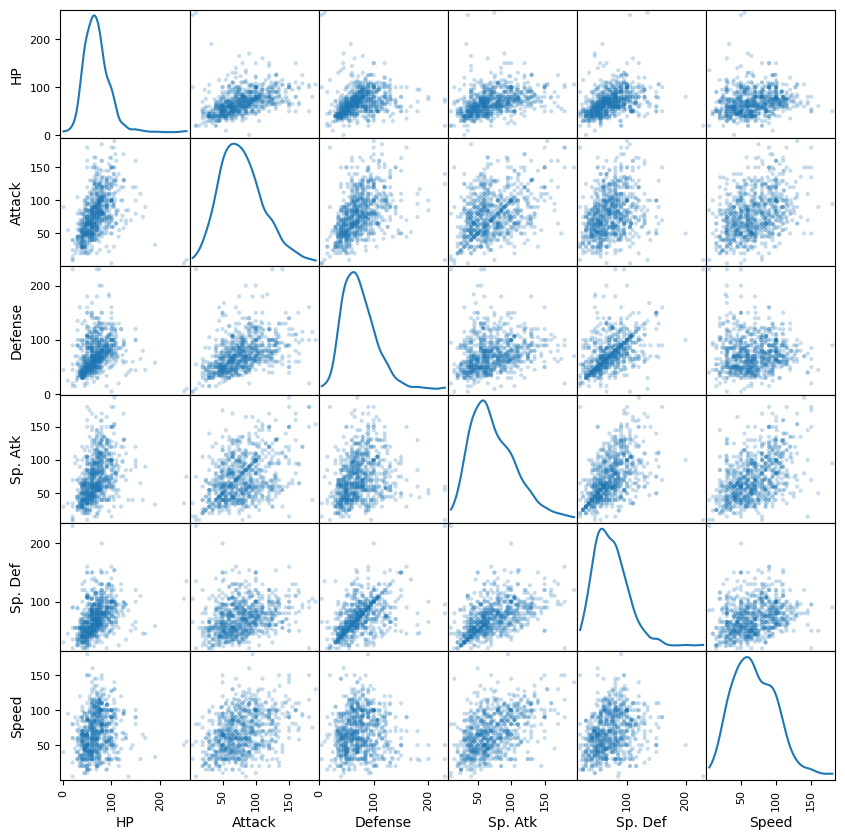

In [ ]:
from pandas.plotting import scatter_matrix
baseStats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
scatter_matrix(df[baseStats], alpha = 0.25, figsize = (10, 10), diagonal = 'kde')

We can see that there is some correlation between Defense and Special Defense, as well as some correlation between Attack and Special Attack as well as Special Attack and Special Defense.

Next, we will look at the average stats for each type. If a Pokemon has dual typing, its stats will count towards both types.

In [ ]:
# Creating data frames for both primary and secondary typings and combining them
# into a single data frame to perform analysis on

typeOneDF = df.drop(['#', 'Name', 'Type 2', 'Generation', 'Legendary'], axis = 1)
typeOneDF.rename(columns = {'Type 1': 'Type'}, inplace = True)

typeTwoDF = df.drop(['#', 'Name', 'Type 1', 'Generation', 'Legendary'], axis = 1)
typeTwoDF.rename(columns = {'Type 2': 'Type'}, inplace = True)

typesDF = pd.concat([typeOneDF, typeTwoDF], ignore_index = True)
typesDF.reset_index()

# Verifying concatenation worked as expected
display(typesDF)

,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,BST
0,Grass,45,49,49,65,65,45,318
1,Grass,60,62,63,80,80,60,405
2,Grass,80,82,83,100,100,80,525
3,Grass,80,100,123,122,120,80,625
4,Fire,39,52,43,60,50,65,309
...,...,...,...,...,...,...,...,...
1595,Fairy,50,100,150,100,150,50,600
1596,Fairy,50,160,110,160,110,110,700
1597,Ghost,80,110,60,150,130,70,600
1598,Dark,80,160,60,170,130,80,680


In [ ]:
# Looking at the mean, median, and standard deviation for each stat grouped by type
typesDF.groupby(['Type']).mean()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,BST
Type,,,,,,,
Bug,56.736111,71.763889,71.111111,53.569444,64.666667,61.680556,379.527778
Dark,70.235294,96.784314,70.941176,77.450980,69.647059,75.843137,460.901961
Dragon,82.900000,105.760000,86.620000,97.440000,86.900000,82.140000,541.760000
Electric,63.200000,69.520000,66.540000,88.960000,73.680000,82.940000,444.840000
Fairy,68.475000,61.575000,70.400000,76.500000,83.125000,55.850000,415.925000
Fighting,74.566038,104.660377,74.056604,66.924528,73.377358,76.528302,470.113208
Fire,70.156250,84.109375,70.093750,93.000000,74.328125,75.421875,467.109375
Flying,71.366337,80.227723,68.227723,76.366337,71.257426,86.386139,453.831683
Ghost,62.826087,76.934783,81.521739,77.478261,76.956522,61.152174,436.869565


In [ ]:
typesDF.groupby(['Type']).median()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,BST
Type,,,,,,,
Bug,60.0,65.0,60.0,50.0,60.0,60.0,392.5
Dark,70.0,90.0,67.0,70.0,65.0,71.0,480.0
Dragon,80.0,100.0,90.0,98.5,90.0,90.0,600.0
Electric,60.0,65.0,61.5,92.5,78.0,86.0,471.5
Fairy,64.5,55.0,65.0,72.5,79.5,50.0,433.0
Fighting,75.0,104.0,75.0,61.0,70.0,75.0,490.0
Fire,70.0,84.5,65.0,92.5,70.0,80.0,496.5
Flying,70.0,77.0,70.0,70.0,70.0,85.0,460.0
Ghost,59.0,72.0,72.5,65.0,75.0,56.0,464.5


In [ ]:
typesDF.groupby(['Type']).std()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,BST
Type,,,,,,,
Bug,16.308637,36.998094,33.250460,26.399331,31.562145,32.618938,116.355692
Dark,20.264835,29.211172,27.871427,32.162906,27.583925,24.831732,113.144908
Dragon,25.651710,31.928849,24.163465,41.088834,28.606586,25.286126,143.146929
Electric,20.711823,25.742239,25.040547,29.084648,22.298934,26.666810,107.540474
Fairy,26.894845,32.411527,32.380589,34.323499,35.147446,26.815179,135.741532
Fighting,22.005689,32.220958,21.911022,32.416075,24.045011,27.906164,113.987459
Fire,19.528749,30.934707,26.261033,31.705991,23.023145,25.230873,118.267804
Flying,21.514517,33.825399,24.730500,32.968386,26.868068,24.359380,123.496483
Ghost,29.196883,30.052844,33.189516,34.128345,28.948196,27.179214,106.301376


We can see that Dragon appears to be the "best" typing, having the highest average stats for HP, Attack, Sp. Atk, and Sp. Def, the highest median stats for HP, Sp. Atk, Sp. Def, and Speed, and the highest average/median BST by a significant margin. This could be due to the fact that a large percentage of Legendaries (Powerful Pokemon, usually with a BST of at least 680) have Dragon typing (Almost 25%). Conversely, Bug appears to be the "weakest" type, having the lowest average/median BST, lowest average HP and Sp. Atk, and lowest median Defense, Sp. Atk, and Sp. Def. Bug is the typing most commonly found early on in the game, so it makes sense that they're the weakest type.

## GUI

Creating a Pokedex GUI

*Note: GUI not finished, need to debug. May try implementing simpler GUI in meantime*

In [ ]:
import pandas as pd
import sys, urllib3
import requests
from PyQt6 import QtNetwork
from PyQt6.QtGui import*
from PyQt6 import QtWidgets
from PyQt6.QtWidgets import*
from PyQt6 import QtCore
from PyQt6.QtCore import pyqtSignal, QTimer, QUrl

class Pokedex(QWidget):
  def __init__(self) -> None:
    super(Pokedex, self).__init__()
    self.initUI()

  def initUI(self):
    self.grid = QtWidgets.QGraphicsGridLayout
    self.setLayout(self.grid)

    self.df = pd.read_json('pokemonData.json')
    self.df = self.df.set_index(['#'])

    self.dropdown = QtWidgets.QFontComboBox(self)
    self.names = self.df['Name'].values
    self.dropdown.addItems(self.names)
    self.grid.addWidget(self.dropdown, 0,0,1,1)

    self.btn = QtWidgets.QPushButton('Search', self)
    self.btn.clicked.connect(self.runSearch)
    self.grid.addWidget(self.btn, 0,1,1,1)

    self.img = QtWidgets.QLabel(self)
    self.grid.addWidget(self.img, 1,1,1,1)

    self.label = QtWidgets.QLabel(self)
    self.label.setAlignment(QtCore.Qt.AlignCenter)
    self.label.setText('\nName:\n\nType:\n\nHP:\n\nAttack:\n\nSp. Attack:\n\nDefense:\n\nSp. Defense:\n\nSpeed:')
    self.label.setAlignment(QtCore.Qt.AlignLeft)
    self.grid.addWidget(self.label, 1,0,1,1)

    self.resize(500, 250)
    self.center()
    self.setWindowTitle('PokeDex')
    self.show()

  def runSearch(self):
    index = self.dropdown.currentIndex()
    val = self.names[index]
    cond = self.df['Name'] == val

    base = 'http://img.pokemondb.net/artwork/'
    img_url = base + val.lower() + '.jpg'
    data = urllib3.urlopen(img_url).read()
    image = QtGui.QImage()
    image.loadFromData(data)
    self.img.setPixmap(QtGui.setPixmap(image))

    name = 'Name:\t\t\t' + val + '\n\n'
    ty = 'Type:\t\t\t' + ', '.join(self.df[cond]['Type'].values[0]) + '\n\n'
    hp = 'HP:\t\t\t' + str(self.df[cond]['HP'].values[0]) + '\n\n'
    atk = 'Attack:\t\t\t' + str(self.df[cond]['Attack'].values[0]) + '\n\n'
    satk = 'Sp. Attack:\t\t\t' + str(self.df[cond]['Sp. Atk'].values[0]) + '\n\n'
    deff = 'Defense:\t\t\t' + str(self.df[cond]['Defense'].values[0]) + '\n\n'
    sdef = 'Sp. Defense:\t\t\t' + str(self.df[cond]['Sp. Def'].values[0]) + '\n\n'
    speed = 'Speed:\t\t\t' + str(self.df[cond]['Speed'].values[0]) + '\n\n'
    total = 'BST:\t\t\t' + str(self.df[cond]['BST'].values[0]) + '\n\n'

    final = name + ty + hp + atk + satk + deff + sdef + speed + total
    self.label.setText(final)

  def center(self):
    qr = self.frameGeometry()
    cp = QtWidgets.QDockWidget().availableGeometry().center()
    qr.moveCenter(cp)
    self.move(qr.topLeft())

def main():
  app = QtWidgets.QApplication(sys.argv)
  app.aboutToQuit.connect(app.deleteLater)

  gui = Pokedex()

  sys.exit(app.exec_())

if __name__ == '__main__':
  main()